# Get data from fedeo_ceda using EODAG

This tutorial will show you how to use EODAG to search and download data from the `fedeo_ceda` provider.

In [1]:
from eodag import EODataAccessGateway

dag = EODataAccessGateway()

## List collections

list all the collections available from the fedeo_ceda provider.

In [2]:
collections = dag.list_collections(provider="fedeo_ceda")
[c["ID"] for c in collections]

['AATSR_ADV_L2_V2.31',
 'AATSR_ADV_L3_V2.31',
 'AATSR_ENS_L2_V2.6',
 'AATSR_ENS_L3_V2.6',
 'AATSR_ORAC_L2_V4.01',
 'AATSR_ORAC_L3_V4.01',
 'AATSR_SU_L2_V4.3',
 'AATSR_SU_L3_V4.3',
 'ACTIVE_LAYER_THICKNESS_L4_AREA4_PP_V03.0',
 'ACTIVE_LAYER_THICKNESS_L4_AREA4_PP_V04.0',
 'ACTIVE_LAYER_THICKNESS_L4_AREA4_PP_V05.0_ANTARCTICA',
 'ACTIVE_LAYER_THICKNESS_L4_AREA4_PP_V05.0_NORTHERN_HEMISPHERE',
 'AGB_MAPS_V2.0',
 'AGB_MAPS_V3.0',
 'AGB_MAPS_V4.0',
 'AGB_MAPS_V5.01',
 'AGB_MAPS_V6.0',
 'AQUA_MODIS_L3C_0.01_V3.00_DAILY',
 'AQUA_MODIS_L3C_0.01_V3.00_MONTHLY',
 'ARCTIC_MSLA_20161024',
 'ATSR2_ADV_L2_V2.31',
 'ATSR2_ADV_L3_V2.31',
 'ATSR2_ENS_L2_V2.6',
 'ATSR2_ENS_L3_V2.6',
 'ATSR2_ORAC_L2_V4.01',
 'ATSR2_ORAC_L3_V4.01',
 'ATSR2_SU_L2_V4.3',
 'ATSR2_SU_L3_V4.3',
 'BURNED_AREA_AVHRR-LTDR_GRID_V1.1',
 'BURNED_AREA_AVHRR-LTDR_PIXEL_V1.1',
 'BURNED_AREA_MODIS_GRID_V5.1',
 'BURNED_AREA_MODIS_PIXEL_V5.1',
 'BURNED_AREA_SENTINEL3_SYN_GRID_V1.1',
 'BURNED_AREA_SENTINEL3_SYN_PIXEL_V1.1',
 'BURNED_AREA_SFDL

## Search data

With one of the collections listed above, you can search for data.

In [3]:
products = dag.search(
    provider="fedeo_ceda",
    start="2008-01-01",
    end="2009-12-31",
    collection="SEA_ICE_THICKNESS_L3C_ENVISAT_V3.0_SH",
)
products

SearchResult([EOProduct(id=f4e5c7465abb04639aefd4b6d19af7b47273480f, provider=fedeo_ceda),
              EOProduct(id=6b8dbf4b92760b8825e9c9e2ea1a20dd890be527, provider=fedeo_ceda),
              EOProduct(id=ed443e8091eaf3b93c8b3ee7c23fc1db011e95f5, provider=fedeo_ceda),
              EOProduct(id=0259d1d7cd752b2a752a1abd533ce2cbf60be5de, provider=fedeo_ceda),
              EOProduct(id=f95eb41dd18104adda2d5c5d71504f8c45fe419b, provider=fedeo_ceda),
              EOProduct(id=10a1f8170b4c79408f2b6a68c828a90972934b01, provider=fedeo_ceda),
              EOProduct(id=94d764c032a73052a990c5851721accc75f07f89, provider=fedeo_ceda),
              EOProduct(id=f2a967c724029057c68b2056b33c5241b9545a9f, provider=fedeo_ceda),
              EOProduct(id=f618f05129c41d2ad3fa0e15b3dcfa063252c7b8, provider=fedeo_ceda),
              EOProduct(id=80640ea796b0ada538e60a3721e8ddc59e2bc7d4, provider=fedeo_ceda),
              EOProduct(id=e1ad18d318caddb5eb97e981c0a9193e3200a270, provider=fedeo_ceda),
              EOProduct(id=362ca8f16bb5f4f750152d5370e6f570257ef2d4, provider=fedeo_ceda),
              EOProduct(id=a8119f3549e446ffec6aaff226dc97106a003433, provider=fedeo_ceda),
              EOProduct(id=9b712d5883624d7de7a755ae144d0125511e845b, provider=fedeo_ceda),
              EOProduct(id=4a9cbfbd1aa3d5f8c484254a04d7d6c1fdfd4b46, provider=fedeo_ceda),
              EOProduct(id=ec9a7903007edd66d1b258c048b388ea790a024e, provider=fedeo_ceda),
              EOProduct(id=af234427f2f8f714cea86a52ddcdf3dbbaf4b3b5, provider=fedeo_ceda),
              EOProduct(id=79cbe04d73e7a9d524518329fd545a984b54a75a, provider=fedeo_ceda),
              EOProduct(id=9318b213fb183bd81877b919123e747bd8942a57, provider=fedeo_ceda),
              EOProduct(id=da6e8b158b906f632c101e6bef3e9f6c2e41d96a, provider=fedeo_ceda)])

## Open dataset with `to_xarray` from [eodag-cube](https://github.com/CS-SI/eodag-cube) and plot over a map using `cartopy`

In [4]:
# Get XarrayDict
xd = products[0].to_xarray()
xd

XarrayDict (1)


In [5]:
# Dataset from XarrayDict first value
ds = next(iter(xd.values()))
ds

<xarray.Dataset> Size: 3MB
Dimensions:                        (yc: 216, xc: 216, time: 1, nv: 2)
Coordinates:
    lat                            (yc, xc) float64 373kB ...
    lon                            (yc, xc) float64 373kB ...
  * time                           (time) datetime64[ns] 8B 2008-01-01
  * xc                             (xc) float64 2kB -5.375e+03 ... 5.375e+03
  * yc                             (yc) float64 2kB 5.375e+03 ... -5.375e+03
Dimensions without coordinates: nv
Data variables: (12/14)
    quality_flag                   (time, yc, xc) int8 47kB ...
    radar_freeboard                (time, yc, xc) float32 187kB ...
    radar_freeboard_uncertainty    (time, yc, xc) float32 187kB ...
    region_code                    (time, yc, xc) int8 47kB ...
    sea_ice_concentration          (time, yc, xc) float32 187kB ...
    sea_ice_freeboard              (time, yc, xc) float32 187kB ...
    ...                             ...
    sea_ice_thickness_uncertainty  (time, yc, xc) float32 187kB ...
    snow_depth                     (time, yc, xc) float32 187kB ...
    snow_depth_uncertainty         (time, yc, xc) float32 187kB ...
    status_flag                    (time, yc, xc) int8 47kB ...
    time_bnds                      (time, nv) datetime64[ns] 16B ...
    Lambert_Azimuthal_Grid         int8 1B ...
Attributes: (12/47)
    title:                     ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-SH_50KM_...
    institution:               Alfred-Wegener-Institut Helmholtz Zentrum für ...
    source:                    Altimetry: envisat, Snow depth: ESA-SICCI AMSR...
    platform:                  Envisat
    sensor:                    RA-2
    history:                   20240220T162330Z - Product generated with pysi...
    ...                        ...
    datetime:                  2008-01-01T00:00:00
    end_datetime:              2008-01-31T23:59:59.999999
    start_datetime:            2008-01-01T00:00:00
    eodag:download_link:       https://fedeo.ceos.org/collections/ab6a05baacc...
    fedeo_ceda:updated:        2024-03-14T12:00:25
    order:status:              succeeded

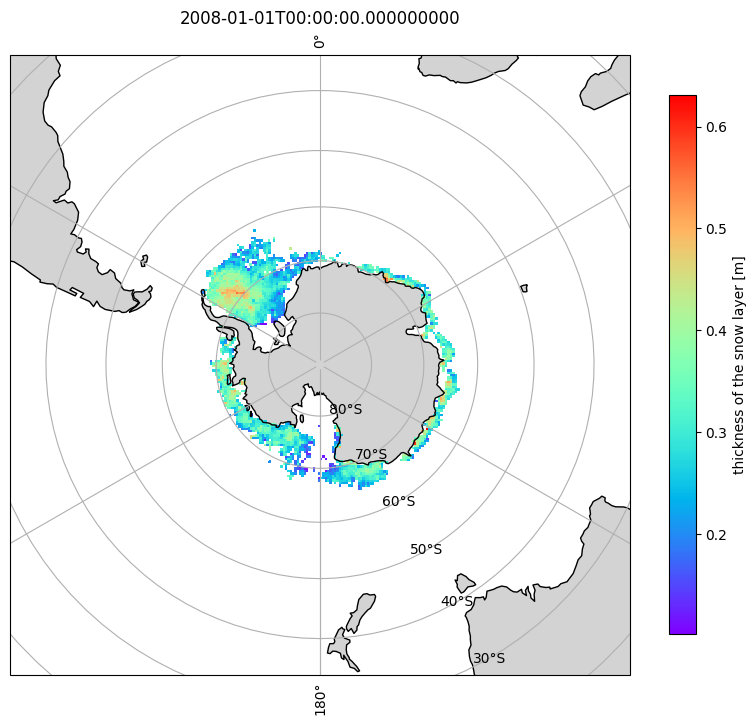

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Take the first time DataArray for snow_depth
da = ds.snow_depth.isel(time=0)

# Use a South Polar Stereographic projection
proj = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)

# Add coastlines, land and gridlines\n",
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.gridlines(draw_labels=True)

# Plot the data
pcm = ax.pcolormesh(da["lon"], da["lat"], da, transform=ccrs.PlateCarree(), cmap="rainbow")

# Colorbar
cb = plt.colorbar(pcm, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cb.set_label(f"{da.attrs.get('long_name', 'value')} [{da.attrs.get('units', '')}]")

plt.title(da['time'].values)
plt.show()

## Download data

In [7]:
path = products[0].download(output_dir="/tmp")
path

0.00B [00:00, ?B/s]

'/tmp/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-SH_50KM_EASE2-200801-fv3p0'